## Actividad: Autoencodes

Implementen un autoencoder para la base de datos de "Emojis". Para ello, sigan los siguientes pasos:


1. Dividan aleatoriamente su conjunto de datos de tal manera que el 80% de los datos sean para entrenamiento y un 20% para prueba. Procuren que en la división las clases mantengan la misma proporción tanto en los datos de entrenamiento como en los de prueba respecto a las proporciones. 

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter


data = np.loadtxt("emojis.txt") 
x = data[:,1:]
y = data[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y)

2. Sigan los pasos del tutorial "Building autoencoders with Keras" para ajustar un autoencoder de una capa oculta para los datos de Emojis utilizando los datos de entrenamiento.

Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: 0.6807 - val_loss: 0.6473
Epoch 2/50
8/8 [==============================] - 0s 21ms/step - loss: 0.6017 - val_loss: 0.5290
Epoch 3/50
8/8 [==============================] - 0s 18ms/step - loss: 0.4992 - val_loss: 0.4565
Epoch 4/50
8/8 [==============================] - 0s 18ms/step - loss: 0.4551 - val_loss: 0.4250
Epoch 5/50
8/8 [==============================] - 0s 21ms/step - loss: 0.4293 - val_loss: 0.4094
Epoch 6/50
8/8 [==============================] - 0s 22ms/step - loss: 0.4151 - val_loss: 0.3978
Epoch 7/50
8/8 [==============================] - 0s 19ms/step - loss: 0.4034 - val_loss: 0.3871
Epoch 8/50
8/8 [==============================] - 0s 21ms/step - loss: 0.3929 - val_loss: 0.3779
Epoch 9/50
8/8 [==============================] - 0s 22ms/step - loss: 0.3835 - val_loss: 0.3703
Epoch 10/50
8/8 [==============================] - 0s 21ms/step - loss: 0.3754 - val_loss: 0.3640
Epoch 11/50
8/8 [============

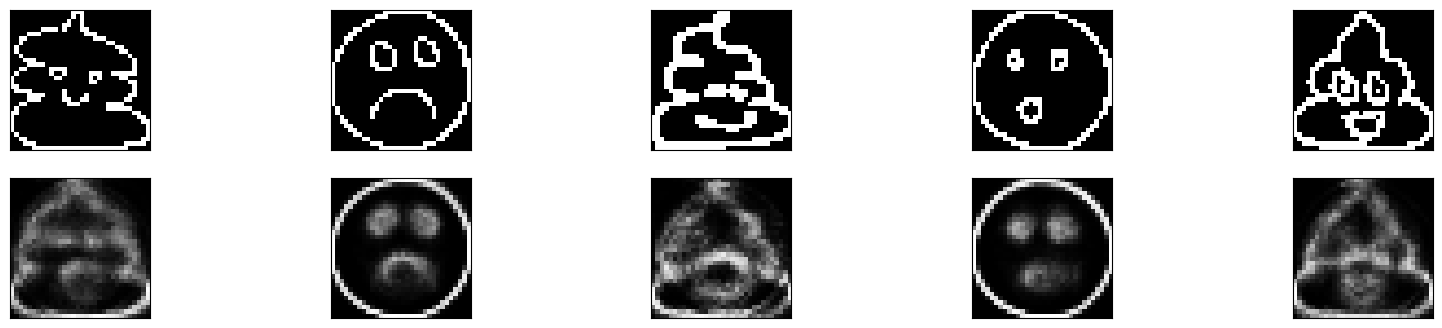

In [4]:
import keras
from keras import layers
import matplotlib.pyplot as plt

encoding_dim = 32


input_img = keras.Input(shape=(x_train.shape[1]))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(x_train.shape[1], activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# 3. Utilicen algunas imágenes del conjunto de prueba para ver la salida de la capa intermedia 
# y de la capa de decodificación. 

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 5 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#4. Evalúen el error cuadrático medio entre las imágenes de prueba 
# y su correspondiente salida.

from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(x_test, decoded_imgs)

print(f'MSE | Datos de prueba: {mse_test}')

5. Agreguen un factor de regularización a la capa intermedia y repitan los pasos 3 y 4 con este nuevo modelo.

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.6791 - val_loss: 0.6412
Epoch 2/100
8/8 [==============================] - 0s 18ms/step - loss: 0.5954 - val_loss: 0.5249
Epoch 3/100
8/8 [==============================] - 0s 18ms/step - loss: 0.5017 - val_loss: 0.4610
Epoch 4/100
8/8 [==============================] - 0s 18ms/step - loss: 0.4595 - val_loss: 0.4319
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.4362 - val_loss: 0.4195
Epoch 6/100
8/8 [==============================] - 0s 19ms/step - loss: 0.4247 - val_loss: 0.4091
Epoch 7/100
8/8 [==============================] - 0s 17ms/step - loss: 0.4147 - val_loss: 0.4000
Epoch 8/100
8/8 [==============================] - 0s 17ms/step - loss: 0.4053 - val_loss: 0.3913
Epoch 9/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3959 - val_loss: 0.3829
Epoch 10/100
8/8 [==============================] - 0s 19ms/step - loss: 0.3873 - val_loss: 0.3751
Epoch 11/100
8/8 [=

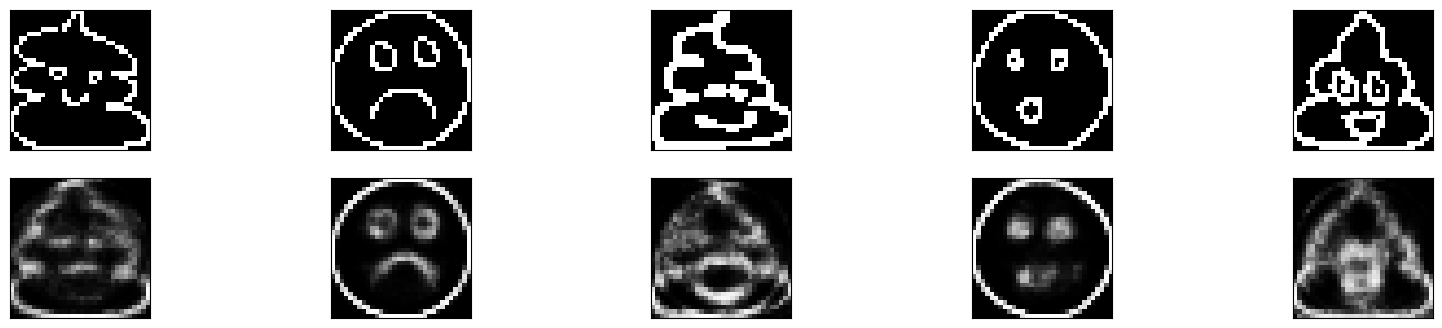

In [5]:
import keras
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers


encoding_dim = 32  

input_img = keras.Input(shape=(x_train.shape[1]))

# Agregamos un factor de regularización a nuestra capa intermedia
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(x_train.shape[1], activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# 3. Utilicen algunas imágenes del conjunto de prueba para ver la salida de la capa intermedia 
# y de la capa de decodificación. 

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 5 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#4. Evalúen el error cuadrático medio entre las imágenes de prueba 
# y su correspondiente salida.

from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(x_test, decoded_imgs)

print(f'MSE | Datos de prueba: {mse_test}')

6. Implemente un autoencoder profundo agregando más capas internas, y evalúen este nuevo modelo tal como se hizo en los dos modelos anteriores.

Epoch 1/100
8/8 [==============================] - 1s 32ms/step - loss: 0.6647 - val_loss: 0.5728
Epoch 2/100
8/8 [==============================] - 0s 21ms/step - loss: 0.5146 - val_loss: 0.4459
Epoch 3/100
8/8 [==============================] - 0s 22ms/step - loss: 0.4397 - val_loss: 0.4204
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 0.4228 - val_loss: 0.4048
Epoch 5/100
8/8 [==============================] - 0s 21ms/step - loss: 0.4098 - val_loss: 0.3930
Epoch 6/100
8/8 [==============================] - 0s 17ms/step - loss: 0.3969 - val_loss: 0.3797
Epoch 7/100
8/8 [==============================] - 0s 18ms/step - loss: 0.3831 - val_loss: 0.3685
Epoch 8/100
8/8 [==============================] - 0s 18ms/step - loss: 0.3739 - val_loss: 0.3620
Epoch 9/100
8/8 [==============================] - 0s 22ms/step - loss: 0.3672 - val_loss: 0.3556
Epoch 10/100
8/8 [==============================] - 0s 20ms/step - loss: 0.3596 - val_loss: 0.3484
Epoch 11/100
8/8 [=

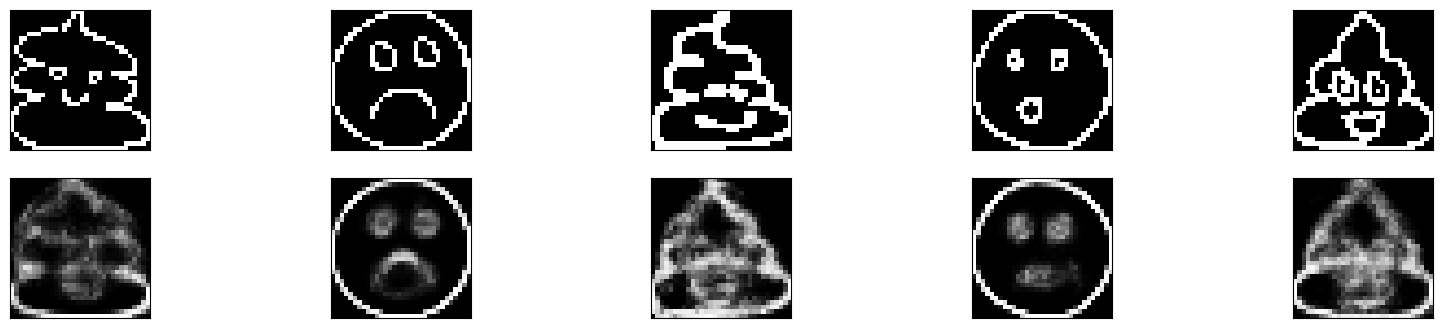

In [6]:
encoding_dim = 32

input_img = keras.Input(shape=(x_train.shape[1],))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(x_train.shape[1], activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 3. Utilicen algunas imágenes del conjunto de prueba para ver la salida de la capa intermedia 
# y de la capa de decodificación. 

decoded_imgs = autoencoder.predict(x_test)

n = 5 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#4. Evalúen el error cuadrático medio entre las imágenes de prueba 
# y su correspondiente salida.

from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(x_test, decoded_imgs)

print(f'MSE | Datos de prueba: {mse_test}')

7. Agreguen ruido binario a algunas imágenes de prueba (es decir, prendan o apaguen algunos pixeles de manera aleatoria), y verifiquen la salida del autoencoder profundo. ¿El modelo es capaz de eliminar ruido en las imágenes de entrada?

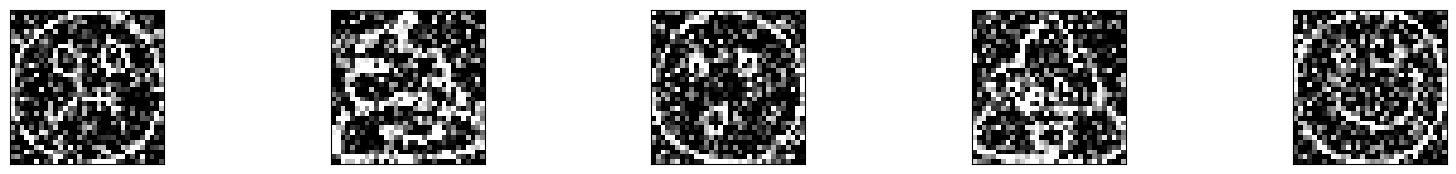

In [7]:
x_train = np.reshape(x_train, (len(x_train), 32, 32, 1))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 5
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
from keras.callbacks import TensorBoard


input_img = keras.Input(shape=(32, 32, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
16/16 [==============================] - 5s 251ms/step - loss: 0.5854 - val_loss: 0.5027
Epoch 2/100
16/16 [==============================] - 4s 221ms/step - loss: 0.5094 - val_loss: 0.4963
Epoch 3/100
16/16 [==============================] - 4s 238ms/step - loss: 0.4992 - val_loss: 0.4878
Epoch 4/100
16/16 [==============================] - 4s 274ms/step - loss: 0.4865 - val_loss: 0.4680
Epoch 5/100
16/16 [==============================] - 5s 287ms/step - loss: 0.4560 - val_loss: 0.4308
Epoch 6/100
16/16 [==============================] - 4s 239ms/step - loss: 0.4174 - val_loss: 0.3898
Epoch 7/100
16/16 [==============================] - 4s 233ms/step - loss: 0.3751 - val_loss: 0.3524
Epoch 8/100
16/16 [==============================] - 4s 227ms/step - loss: 0.3409 - val_loss: 0.3244
Epoch 9/100
16/16 [==============================] - 4s 227ms/step - loss: 0.3151 - val_loss: 0.3100
Epoch 10/100
16/16 [==============================] - 4s 226ms/step - loss: 0.2994 - val_lo

16/16 [==============================] - 0s 11ms/step


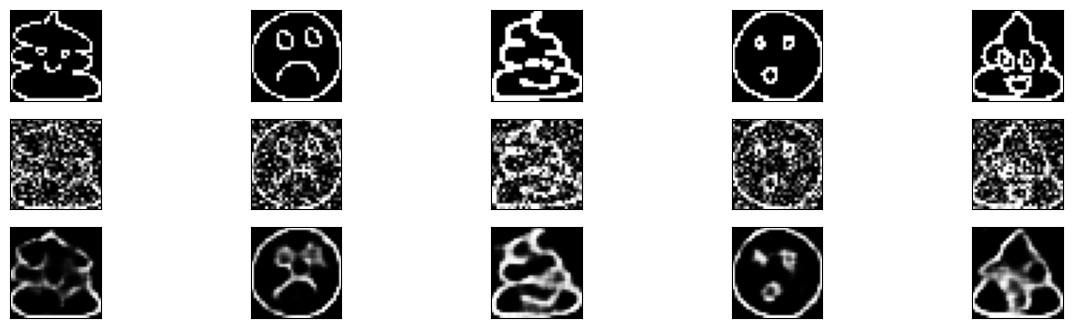

In [9]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 5  # número de imágenes a mostrar
plt.figure(figsize=(15, 4))
for i in range(n):
    # Muestra la imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Muestra la imagen ruidosa
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Muestra la imagen reconstruida
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
